# <b><span style='color:#F1A424'>AutoCluster - Iris Dataset</span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Dataset used - Iris Dataset**

**Features**:

- `id`: Unique identifier .
- `sepal_length`: Length of sepal.
- `sepal_width`: Width of sepal.
- `petal_length`: Length of petal.
- `petal_width`: Width of petal.
- `species`: Species 

**Target Variable**:

- No target variable for clustering.

        
**Objective**:

The primary objective is typically to build a model that can accurately segregate the dataset into clusters.

**Usecase**:

Here, we will use AutoCluster(Automated Machine Learning for Clustering) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
from teradataml import AutoML, AutoCluster

In [3]:
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit
from teradataml import copy_to_sql

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandhost = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)as as pd

## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [11]:
load_example_data("byom", "iris_input")

In [12]:
iris_input = DataFrame("iris_input")

In [13]:
iris_input.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
3,4.7,3.2,1.3,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1
9,4.4,2.9,1.4,0.2,1
10,4.9,3.1,1.5,0.1,1
8,5.0,3.4,1.5,0.2,1
4,4.6,3.1,1.5,0.2,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [14]:
iris_input.shape

(150, 6)

In [15]:
iris_sample = iris_input.sample(frac=[0.9, 0.1])

In [16]:
iris_sample.head()

id,sepal_length,sepal_width,petal_length,petal_width,species,sampleid
3,4.7,3.2,1.3,0.2,1,1
5,5.0,3.6,1.4,0.2,1,1
6,5.4,3.9,1.7,0.4,1,1
7,4.6,3.4,1.4,0.3,1,2
9,4.4,2.9,1.4,0.2,1,1
10,4.9,3.1,1.5,0.1,1,1
8,5.0,3.4,1.5,0.2,1,1
4,4.6,3.1,1.5,0.2,1,1
2,4.9,3.0,1.4,0.2,1,1
1,5.1,3.5,1.4,0.2,1,1


In [17]:
iris_train = iris_sample[iris_sample.sampleid == "1"].drop("sampleid", axis = 1)
iris_val = iris_sample[iris_sample.sampleid == "2"].drop("sampleid", axis = 1)

In [22]:
iris_train_df = iris_train.drop(columns=["id"], axis=1)
iris_val_df = iris_val.drop(columns=["id"], axis=1)

In [23]:
iris_train_df.head()

sepal_length,sepal_width,petal_length,petal_width,species
4.4,2.9,1.4,0.2,1
4.6,3.1,1.5,0.2,1
4.6,3.2,1.4,0.2,1
4.6,3.6,1.0,0.2,1
4.7,3.2,1.3,0.2,1
4.8,3.4,1.9,0.2,1
4.7,3.2,1.6,0.2,1
4.5,2.3,1.3,0.3,1
4.4,3.0,1.3,0.2,1
4.3,3.0,1.1,0.1,1


In [24]:
iris_val_df.head()

sepal_length,sepal_width,petal_length,petal_width,species
5.4,3.4,1.5,0.4,1
5.9,3.2,4.8,1.8,2
6.0,2.7,5.1,1.6,2
6.3,3.3,4.7,1.6,2
6.3,2.5,4.9,1.5,2
6.4,3.1,5.5,1.8,3
6.3,2.8,5.1,1.5,3
5.6,2.5,3.9,1.1,2
4.6,3.4,1.4,0.3,1
4.4,3.2,1.3,0.2,1


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

OR

In [25]:
cl = AutoCluster(verbose=2,
                 max_runtime_secs=300)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 135
Total Columns in the data: 5

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
petal_width,FLOAT,135,0,None,0,135,0,0.0,100.0
species,INTEGER,135,0,None,0,135,0,0.0,100.0
sepal_length,FLOAT,135,0,None,0,135,0,0.0,100.0
petal_length,FLOAT,135,0,None,0,135,0,0.0,100.0
sepal_width,FLOAT,135,0,None,0,135,0,0.0,100.0



Statistics of Data:


ATTRIBUTE,StatName,StatValue
petal_width,MAXIMUM,2.5
petal_width,STANDARD DEVIATION,0.7729771296077448
petal_width,PERCENTILES(25),0.3
petal_width,PERCENTILES(50),1.3
sepal_width,COUNT,135.0
sepal_width,MINIMUM,2.0
sepal_length,COUNT,135.0
sepal_length,MINIMUM,4.3
sepal_length,MAXIMUM,7.9
sepal_length,MEAN,5.820740740740743


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width           0.740741


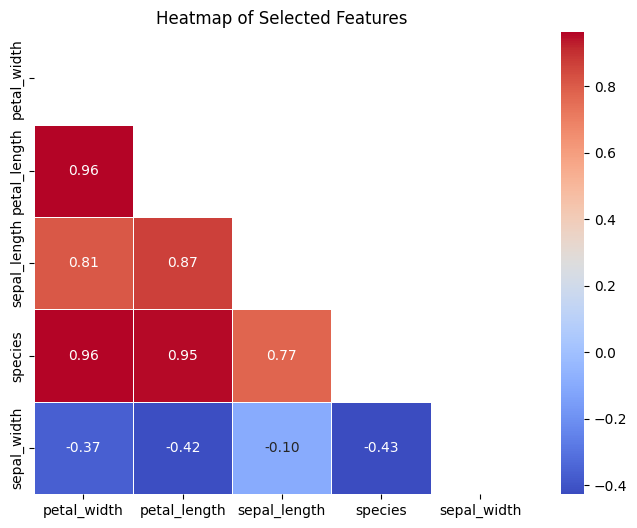


Number of features selected for Boxplots: 5

Selection Criteria: Top Correlated Feature Pairs

Selected Features: petal_width, petal_length, sepal_length, species, sepal_width

Boxplots:


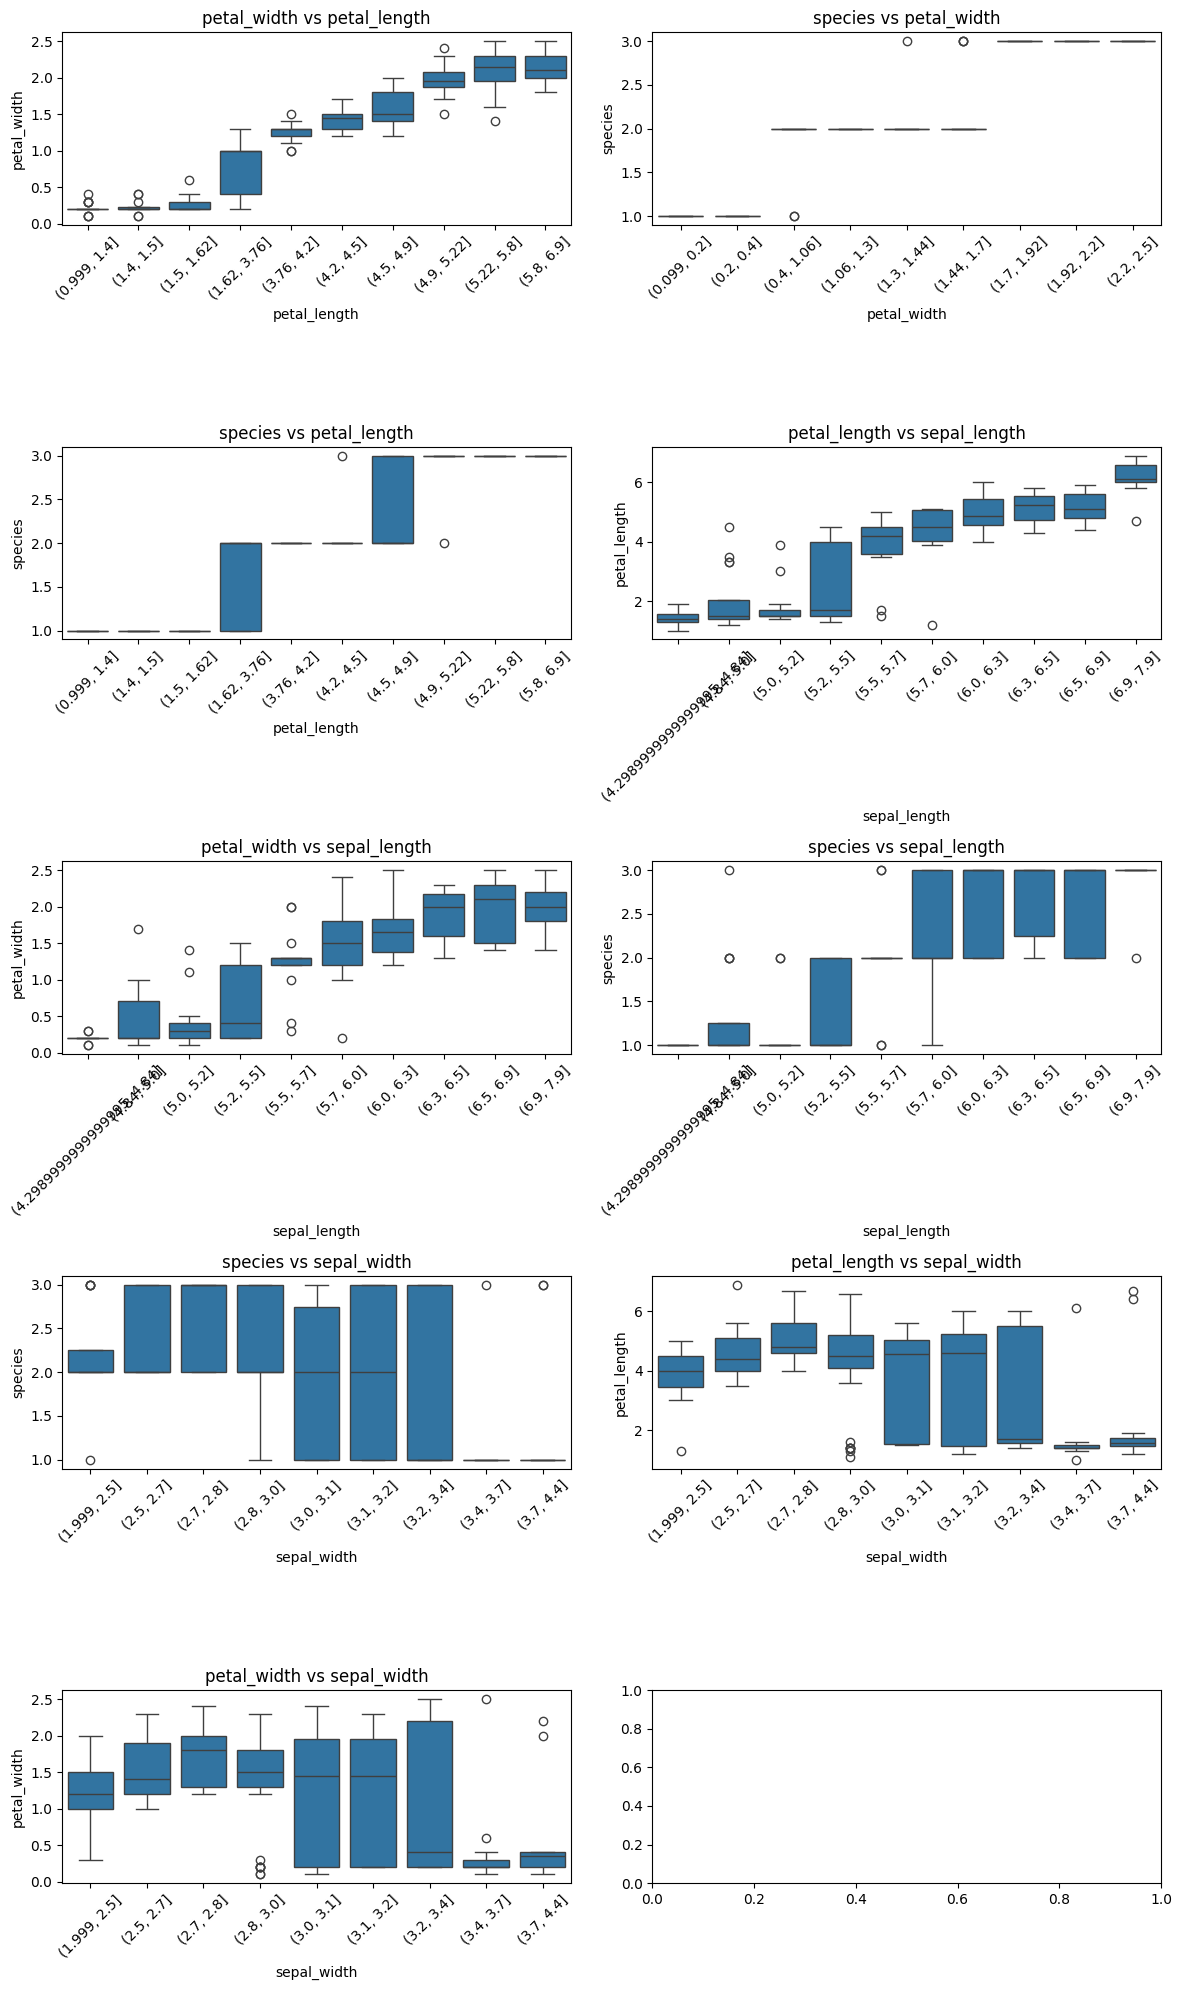

No categorical columns found with unique values within the threshold.

Scatter Plots for Top Correlated Feature Pairs:


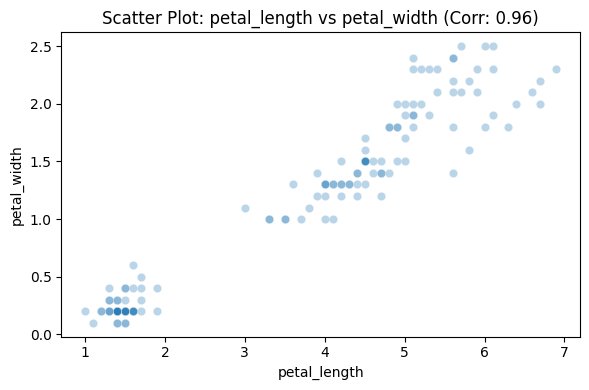

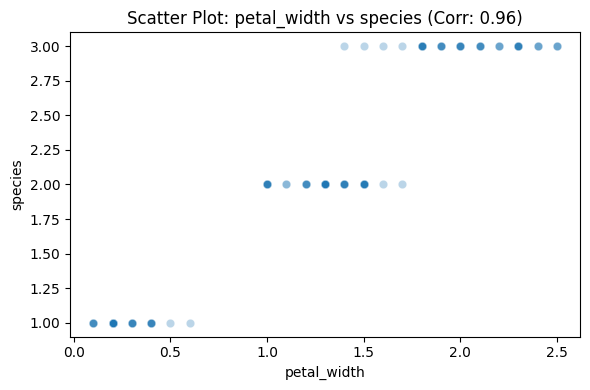

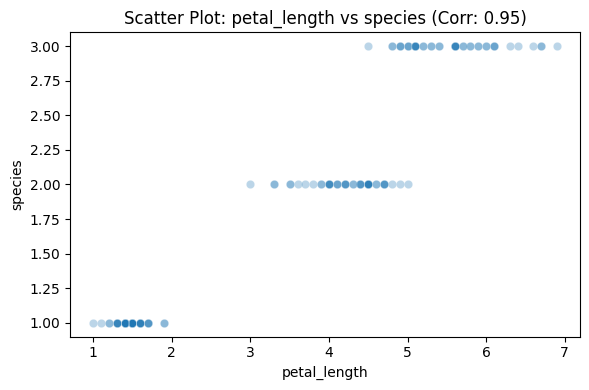

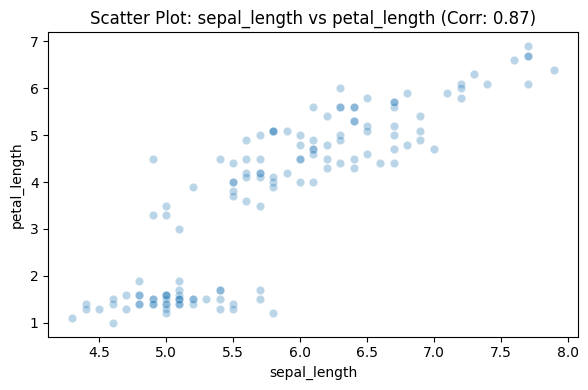

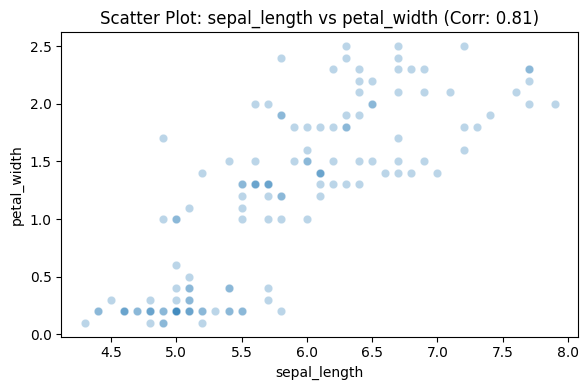

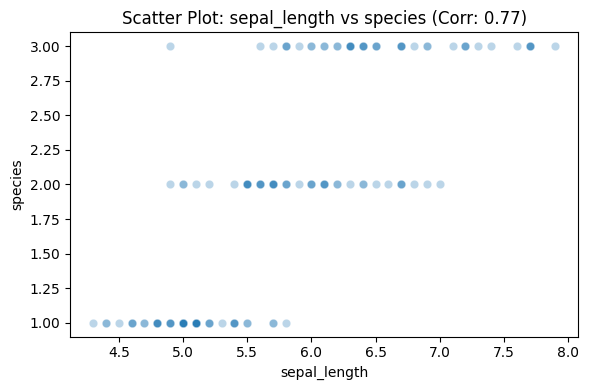

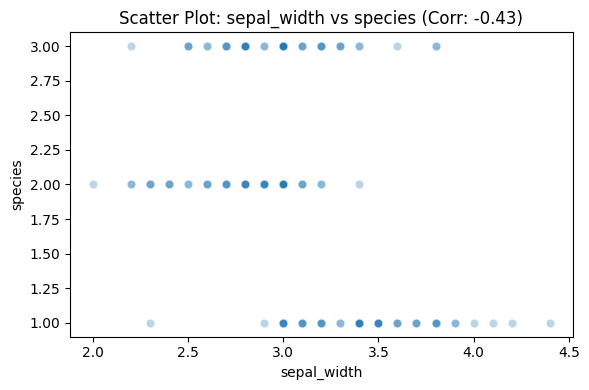

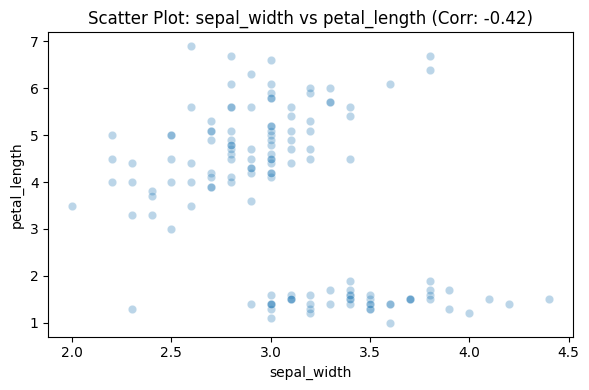

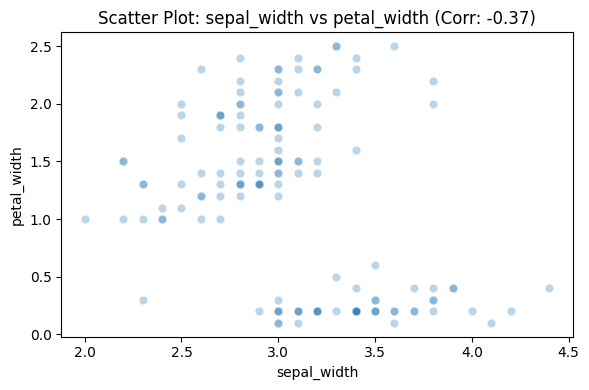

sepal_length,sepal_width,petal_length,petal_width,species
7.3,2.9,6.3,1.8,3
6.1,2.8,4.7,1.2,2
6.3,2.9,5.6,1.8,3
4.9,2.4,3.3,1.0,2
6.5,3.0,5.2,2.0,3
4.9,3.1,1.5,0.2,1
6.1,2.8,4.0,1.3,2
4.8,3.0,1.4,0.1,1
4.6,3.2,1.4,0.2,1
7.7,3.0,6.1,2.3,3


Remaining Rows in the data: 134                                                         
Remaining Columns in the data: 5


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width           0.746269


['sepal_width']


sepal_length,sepal_width,petal_length,petal_width,species,id
6.2,2.2,4.5,1.5,2,55
6.2,3.4,5.4,2.3,3,77
6.1,2.6,5.6,1.4,3,75
6.1,3.0,4.6,1.4,2,26
6.1,3.0,4.9,1.8,3,51
6.1,2.9,4.7,1.4,2,140
6.1,2.8,4.7,1.2,2,9
6.2,2.8,4.8,1.8,3,120
6.2,2.9,4.3,1.3,2,95
7.4,2.8,6.1,1.9,3,71


['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


id,sepal_length,sepal_width,petal_length,petal_width,species
124,1.6511508361938583,0.32915351541529175,1.3090797247058712,0.8165672502160286,1.2574586507658685
95,0.45388778397536855,-0.367266027726533,0.3492845483685763,0.16757548551289797,0.03644807683379339
55,0.45388778397536855,-1.992244961724122,0.4622016279376699,0.4271721913941502,0.03644807683379339
15,1.7708771414157067,-0.367266027726533,1.4784553440595114,0.8165672502160286,1.2574586507658685
54,0.5736140891972171,-1.2958254185822984,0.7444943268604036,0.9463656031566546,1.2574586507658685
110,1.5314245309720087,-0.13512618001259144,1.2526211849213247,1.2059623090379072,1.2574586507658685
82,-0.503922657799423,1.4898527539849986,-1.2315545655987328,-1.2602063968339896,-1.1845624970982818
104,-0.503922657799423,1.9541324494128807,-1.344471645167826,-1.0006096909527373,-1.1845624970982818
57,0.5736140891972171,0.5612933631292323,1.3090797247058712,1.7251557208004116,1.2574586507658685
71,1.8906034466375563,-0.5994058754404746,1.3655382644904177,0.9463656031566546,1.2574586507658685


['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


id,sepal_length,sepal_width,petal_length,petal_width,species
124,1.6511508361938583,0.32915351541529175,1.3090797247058712,0.8165672502160284,1.2574586507658685
82,-0.503922657799423,1.4898527539849986,-1.2315545655987328,-1.26020639683399,-1.1845624970982818
104,-0.503922657799423,1.9541324494128807,-1.344471645167826,-1.0006096909527376,-1.1845624970982818
15,1.7708771414157067,-0.367266027726533,1.4784553440595114,0.8165672502160284,1.2574586507658685
54,0.5736140891972171,-1.2958254185822984,0.7444943268604036,0.9463656031566543,1.2574586507658685
71,1.8906034466375563,-0.5994058754404746,1.3655382644904177,0.9463656031566543,1.2574586507658685
95,0.45388778397536855,-0.367266027726533,0.3492845483685763,0.16757548551289767,0.03644807683379339
55,0.45388778397536855,-1.992244961724122,0.4622016279376699,0.4271721913941499,0.03644807683379339
57,0.5736140891972171,0.5612933631292323,1.3090797247058712,1.7251557208004114,1.2574586507658685
110,1.5314245309720087,-0.13512618001259144,1.2526211849213247,1.2059623090379068,1.2574586507658685


['col_0', 'col_1']


Model: KMeans                                                                                                                                         
name: KMeans
Hyperparameter Grid:
  n_clusters: (2, 3, 4, 5, 6, 7, 8, 9, 10)
  init: ('k-means++', 'random')
  n_init: (5, 10)
  max_iter: (100, 200)
  tol: (0.001, 0.01)
  algorithm: ('auto', 'full')
Total number of models for KMeans: 288
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model: GaussianMixture
name: GaussianMixture
Hyperparameter Grid:
  n_components: (2, 3, 4, 5, 6, 7, 8, 9, 10)
  covariance_type: ('full', 'tied', 'diag', 'spherical')
  max_iter: (100, 300)
Total number of models for GaussianMixture: 72
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model_id:KMEANS_2 - Run time:4.072s -  Start time:487.400731 -  End time: 491.4729984 - Status:PASS - SILHOUETTE:0.592
Model_id:KMEANS_0 - Run time:4.22s -  Start time:487.3977049 -  End time: 491.6178185 - Status:PASS - SILHOUETTE:0.592
Model_id:KMEANS_3 - Run time:4.222s -  Start time:487.4025984 -  End time: 491.6242718 - Status:PASS - SILHOUETTE:0.592
Model_id:KMEANS_1 - Run time:4.229s -  Start time:487.3994091 -  End time: 491.6288862 - Status:PASS - SILHOUETTE:0.592


Model_id:GAUSSIANMIXTURE_1 - Run time:1.151s -  Start time:602.603456 -  End time: 603.7547937 - Status:PASS - SILHOUETTE:0.037
Model_id:GAUSSIANMIXTURE_2 - Run time:1.158s -  Start time:602.6052956 -  End time: 603.7628201 - Status:PASS - SILHOUETTE:0.415
Model_id:GAUSSIANMIXTURE_0 - Run time:1.145s -  Start time:602.6024101 -  End time: 603.7471569 - Status:PASS - SILHOUETTE:0.415
Model_id:GAUSSIANMIXTURE_3 - Run time:1.128s -  Start time:602.6068841 -  End time: 603.7345705 - Status:PASS - SILHOUETTE:0.037


,RANK,MODEL_ID,FEATURE_SELECTION,SILHOUETTE,CALINSKI,DAVIES
0,1,KMEANS_0,pca,0.592205,331.356348,0.544790
1,2,KMEANS_2,pca,0.592074,331.360928,0.544644
2,3,KMEANS_3,non_pca,0.591820,331.201966,0.544931
3,4,KMEANS_1,non_pca,0.591820,331.201966,0.544931
4,5,GAUSSIANMIXTURE_2,pca,0.415363,150.741915,0.735466
5,6,GAUSSIANMIXTURE_0,pca,0.415363,150.741915,0.735466
6,7,GAUSSIANMIXTURE_3,non_pca,0.036611,5.169350,4.223862
7,8,GAUSSIANMIXTURE_1,non_pca,0.036611,5.169350,4.223862


In [26]:
cl.fit(iris_train_df)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [27]:
cl.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,SILHOUETTE,CALINSKI,DAVIES
0,1,KMEANS_0,pca,0.592205,331.356348,0.544790
1,2,KMEANS_2,pca,0.592074,331.360928,0.544644
2,3,KMEANS_3,non_pca,0.591820,331.201966,0.544931
3,4,KMEANS_1,non_pca,0.591820,331.201966,0.544931
4,5,GAUSSIANMIXTURE_2,pca,0.415363,150.741915,0.735466
5,6,GAUSSIANMIXTURE_0,pca,0.415363,150.741915,0.735466
6,7,GAUSSIANMIXTURE_3,non_pca,0.036611,5.169350,4.223862
7,8,GAUSSIANMIXTURE_1,non_pca,0.036611,5.169350,4.223862


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [28]:
cl.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,SILHOUETTE,CALINSKI,DAVIES
0,1,KMEANS_0,pca,0.592205,331.356348,0.54479


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [29]:
cl.model_hyperparameters(rank=3)

{'n_clusters': 2,
 'init': 'k-means++',
 'n_init': 5,
 'max_iter': 100,
 'tol': 0.001,
 'algorithm': 'auto'}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction : </b>

Data Transformation started for clustering ...


id,sepal_length,sepal_width,petal_length,petal_width,species
11,-0.2644700473557259,-1.2958254185822984,0.12345038923038933,-0.09202122036835454,0.03644807683379339
15,0.8130666996409153,-0.13512618001259144,1.0267870257831375,0.8165672502160284,1.2574586507658685
14,1.0525193100846133,-1.2958254185822984,1.1961626451367775,0.8165672502160284,1.2574586507658685
5,-0.503922657799423,0.7934332108431739,-1.2315545655987328,-1.0006096909527376,-1.1845624970982818
7,0.9327930048627638,-0.367266027726533,0.5186601677222165,0.16757548551289767,0.03644807683379339
12,0.5736140891972171,-0.5994058754404746,0.8009528666449502,0.4271721913941499,1.2574586507658685
4,-1.7011857100179126,0.32915351541529175,-1.344471645167826,-1.26020639683399,-1.1845624970982818
8,0.5736140891972171,-1.2958254185822984,0.6880357870758571,0.4271721913941499,0.03644807683379339
19,0.2144351735316704,-0.8315457231544151,0.8009528666449502,0.5569705443347761,0.03644807683379339
13,0.6933403944190667,0.09701366770135016,1.0267870257831375,0.8165672502160284,1.2574586507658685


,id,col_0,col_1
0,5,-2.112591,-0.463723
1,17,0.714613,-0.407246
2,7,0.861245,-0.036822
3,19,0.982214,0.630608
4,8,1.123154,0.935591
5,13,1.839586,-0.411996
6,12,1.632355,0.306679
7,15,1.944424,-0.242571
8,11,0.205114,1.299135
9,4,-2.728723,0.434789


id,sepal_length,sepal_width,petal_length,petal_width,species
14,1.0525193100846133,-1.2958254185822984,1.1961626451367775,0.8165672502160286,1.2574586507658685
8,0.5736140891972171,-1.2958254185822984,0.6880357870758571,0.4271721913941502,0.03644807683379339
7,0.9327930048627638,-0.367266027726533,0.5186601677222165,0.16757548551289797,0.03644807683379339
12,0.5736140891972171,-0.5994058754404746,0.8009528666449502,0.4271721913941502,1.2574586507658685
17,0.09470886830982186,0.32915351541529175,0.63157724729131,0.8165672502160286,0.03644807683379339
13,0.6933403944190667,0.09701366770135016,1.0267870257831375,0.8165672502160286,1.2574586507658685
11,-0.2644700473557259,-1.2958254185822984,0.12345038923038933,-0.09202122036835426,0.03644807683379339
4,-1.7011857100179126,0.32915351541529175,-1.344471645167826,-1.2602063968339896,-1.1845624970982818
5,-0.503922657799423,0.7934332108431739,-1.2315545655987328,-1.0006096909527373,-1.1845624970982818
15,0.8130666996409153,-0.13512618001259144,1.0267870257831375,0.8165672502160286,1.2574586507658685


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 9/9            

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_0 
Feature Selection Method : pca

Visualizing Clusters for interpretability...
   id     col_0     col_1
0   5 -2.112591 -0.463723
1  17  0.714613 -0.407246
2   7  0.861245 -0.036822
3  19  0.982214  0.630608
4   8  1.123154  0.935591
Selection Criteria: Top 2 High Variance Features
Selected Features: col_0, col_1


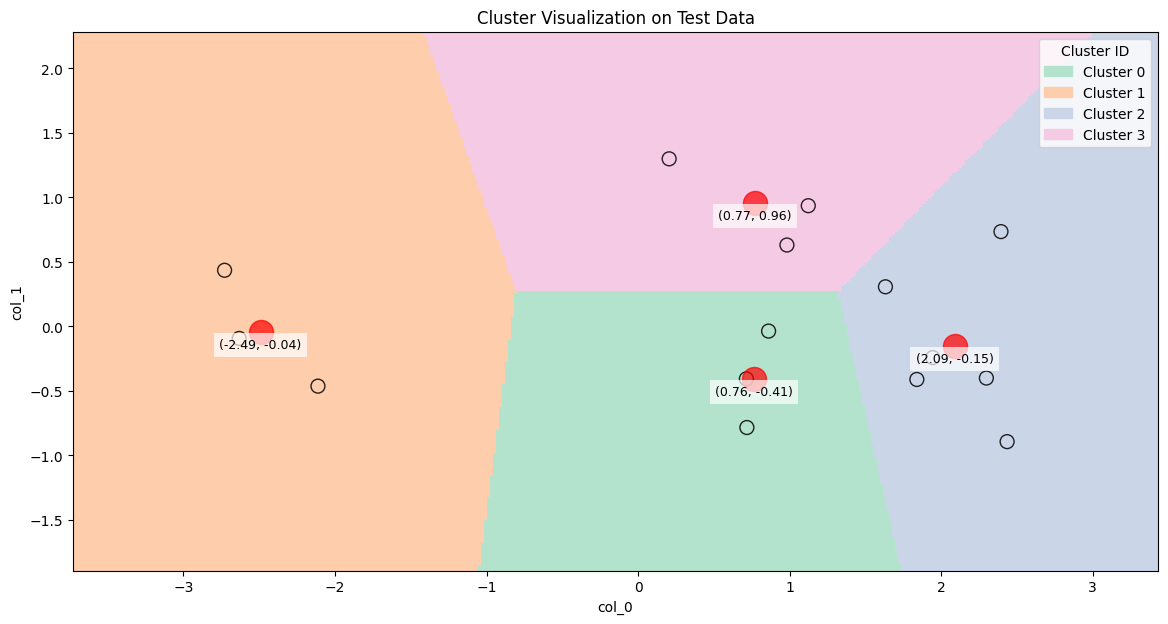


 Cluster Assignment:
   id  cluster_assignment
0   4                   0
1   6                   0
2  16                   0
3  10                   0
4  19                   0
5  17                   0
6  15                   0
7  14                   0
8  11                   0
9  13                   0


In [31]:
prediction = cl.predict(iris_val_df, rank=1)

In [32]:
prediction.head()

id,cluster_assignment
6,0
8,0
9,0
10,0
12,0
13,0
11,0
7,0
5,0
4,0



Skipping data transformation as data is already transformed.

Following model is being picked for evaluation of clustering:
Model ID : GAUSSIANMIXTURE_2 
Feature Selection Method : pca

Visualizing Clusters for interpretability...
   id     col_0     col_1
0   5 -2.112591 -0.463723
1  17  0.714613 -0.407246
2   7  0.861245 -0.036822
3  19  0.982214  0.630608
4   8  1.123154  0.935591
Selection Criteria: Top 2 High Variance Features
Selected Features: col_0, col_1


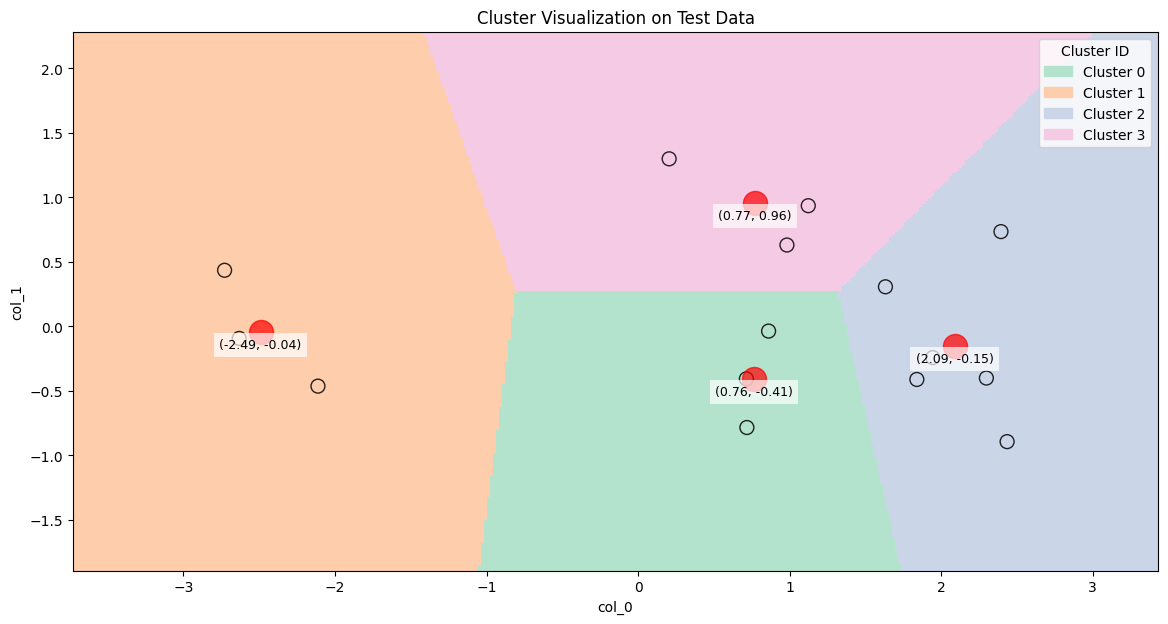


 Cluster Assignment:
   id  cluster_assignment
0   4                   1
1   6                   1
2  16                   1
3  10                   1
4  19                   1
5  17                   1
6  15                   1
7  14                   1
8  11                   1
9  13                   1


In [33]:
prediction_2 = cl.predict(iris_val_df, rank=5)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_3 
Feature Selection Method : non_pca

Visualizing Clusters for interpretability...
   id  sepal_length  sepal_width  petal_length  petal_width   species
0   5     -0.503923     0.793433     -1.231555    -1.000610 -1.184562
1  17      0.094709     0.329154      0.631577     0.816567  0.036448
2   7      0.932793    -0.367266      0.518660     0.167575  0.036448
3  19      0.214435    -0.831546      0.800953     0.556971  0.036448
4   8      0.573614    -1.295825      0.688036     0.427172  0.036448
Selection Criteria: Top 2 High Variance Features
Selected Features: species, petal_length


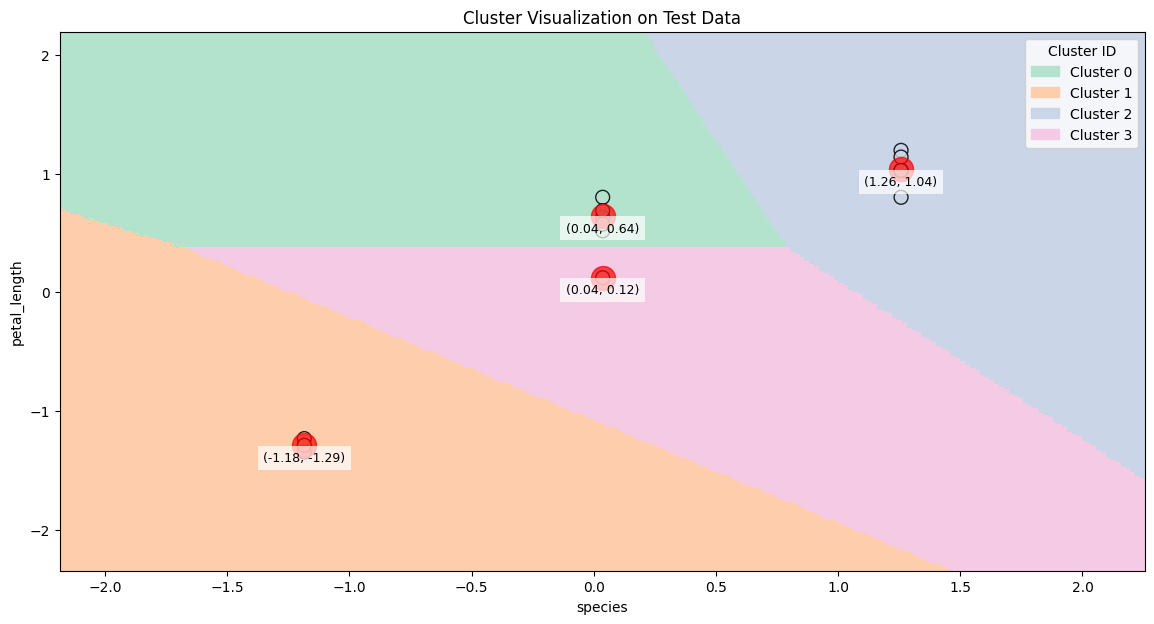


 Cluster Assignment:
   id  cluster_assignment
0   9                   1
1   7                   1
2  12                   1
3   4                   1
4   6                   1
5  15                   1
6  13                   1
7  16                   1
8  11                   1
9   8                   1


In [34]:
prediction_3 = cl.predict(iris_val_df, rank=3)

Data Transformation started for clustering ...


id,sepal_length,sepal_width,petal_length,petal_width,species
34,0.334161478753519,-0.5994058754404746,0.17990892901493613,0.16757548551289767,0.03644807683379339
19,-0.9828278786868193,0.32915351541529175,-1.4009301849523732,-1.26020639683399,-1.1845624970982818
59,-0.8631015734649707,1.721992601698939,-1.1750960258141858,-1.26020639683399,-1.1845624970982818
40,-0.9828278786868193,-0.13512618001259144,-1.1750960258141858,-1.26020639683399,-1.1845624970982818
120,1.6511508361938583,-0.13512618001259144,1.1961626451367775,0.5569705443347761,1.2574586507658685
61,1.0525193100846133,0.09701366770135016,0.4057430881531234,0.29737383845352366,0.03644807683379339
38,0.6933403944190667,-0.8315457231544151,0.9138699462140438,0.9463656031566543,1.2574586507658685
78,-0.38419635257757445,-1.7601051140101815,0.17990892901493613,0.16757548551289767,0.03644807683379339
80,0.2144351735316704,-0.367266027726533,0.4622016279376699,0.4271721913941499,0.03644807683379339
122,0.5736140891972171,-1.2958254185822984,0.7444943268604036,0.9463656031566543,1.2574586507658685


,id,col_0,col_1
0,61,0.818805,-0.515245
1,101,3.078950,-0.832406
2,40,-2.220121,0.588324
3,122,2.017385,0.920637
4,38,2.053376,0.441527
5,17,1.477713,-0.005413
6,80,0.642529,0.219620
7,19,-2.437812,0.166147
8,78,0.413111,1.755866
9,34,0.474747,0.413120


id,sepal_length,sepal_width,petal_length,petal_width,species
34,0.334161478753519,-0.5994058754404746,0.17990892901493613,0.16757548551289797,0.03644807683379339
80,0.2144351735316704,-0.367266027726533,0.4622016279376699,0.4271721913941502,0.03644807683379339
120,1.6511508361938583,-0.13512618001259144,1.1961626451367775,0.5569705443347764,1.2574586507658685
61,1.0525193100846133,0.09701366770135016,0.4057430881531234,0.29737383845352394,0.03644807683379339
78,-0.38419635257757445,-1.7601051140101815,0.17990892901493613,0.16757548551289797,0.03644807683379339
122,0.5736140891972171,-1.2958254185822984,0.7444943268604036,0.9463656031566546,1.2574586507658685
19,-0.9828278786868193,0.32915351541529175,-1.4009301849523732,-1.2602063968339896,-1.1845624970982818
59,-0.8631015734649707,1.721992601698939,-1.1750960258141858,-1.2602063968339896,-1.1845624970982818
38,0.6933403944190667,-0.8315457231544151,0.9138699462140438,0.9463656031566546,1.2574586507658685
40,-0.9828278786868193,-0.13512618001259144,-1.1750960258141858,-1.2602063968339896,-1.1845624970982818


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 9/9            

Following model is being picked for evaluation of clustering:
Model ID : GAUSSIANMIXTURE_0 
Feature Selection Method : pca

Visualizing Clusters for interpretability...
    id     col_0     col_1
0   61  0.818805 -0.515245
1  101  3.078950 -0.832406
2   40 -2.220121  0.588324
3  122  2.017385  0.920637
4   38  2.053376  0.441527
Selection Criteria: Top 2 High Variance Features
Selected Features: col_0, col_1


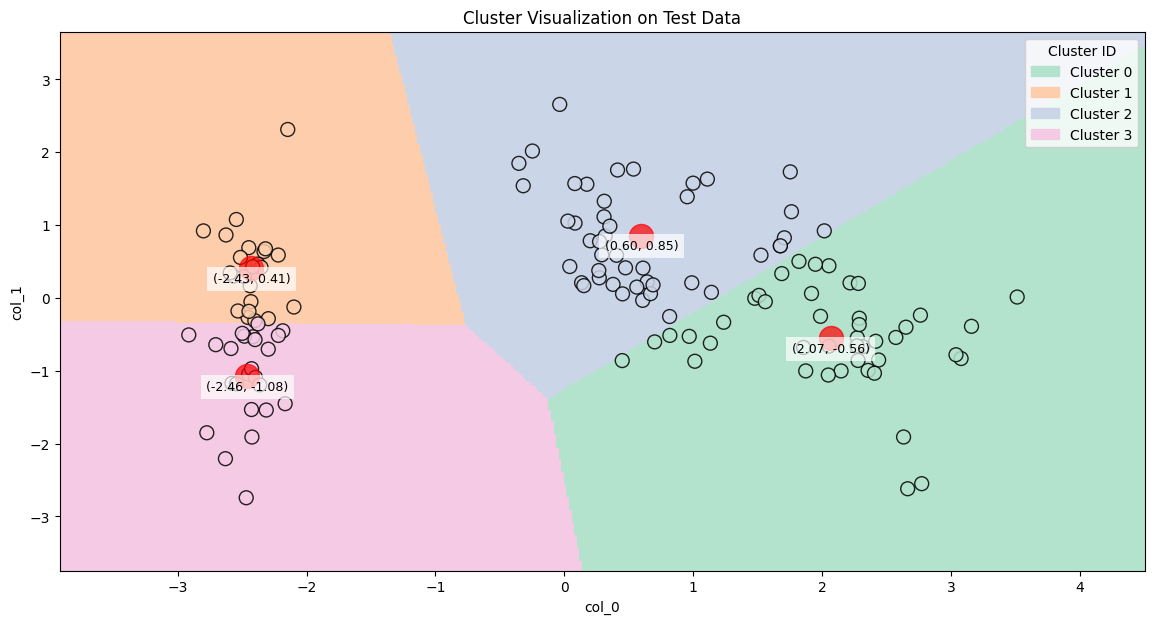


 Cluster Assignment:
    id  cluster_assignment
0   34                   0
1   76                   1
2   13                   1
3   57                   0
4   32                   0
5  118                   1
6  116                   1
7  120                   1
8   78                   0
9   17                   0


In [35]:
prediction_4 = cl.predict(iris_train_df, rank=6)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_0 
Feature Selection Method : pca

Visualizing Clusters for interpretability...
    id     col_0     col_1
0   61  0.818805 -0.515245
1  101  3.078950 -0.832406
2   40 -2.220121  0.588324
3  122  2.017385  0.920637
4   38  2.053376  0.441527
Selection Criteria: Top 2 High Variance Features
Selected Features: col_0, col_1


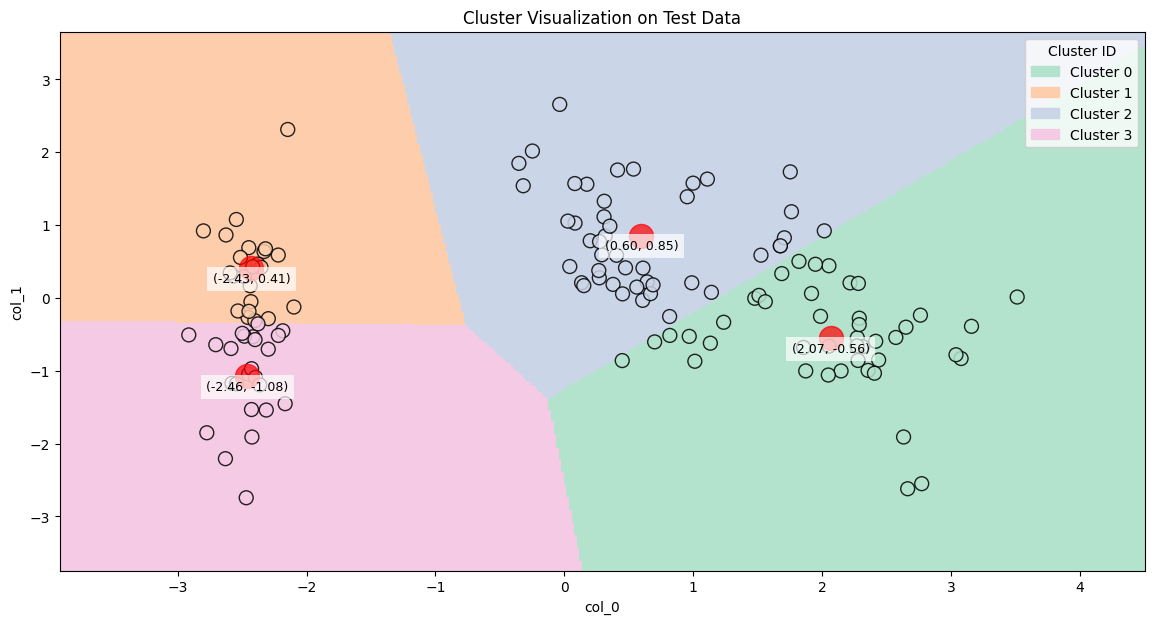


 Cluster Assignment:
    id  cluster_assignment
0   34                   0
1   76                   1
2   13                   0
3   57                   0
4   32                   0
5  118                   1
6  116                   1
7  120                   1
8   78                   1
9   17                   0


In [37]:
prediction_5 = cl.predict(iris_train_df, rank=1)

In [38]:
remove_context()

True